# 3.4 선형회귀분석

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [1]:
# Git에서 파일 연동하기
!git clone https://github.com/sangsucki/DataDrivenReport.git

Cloning into 'DataDrivenReport'...
remote: Enumerating objects: 76, done.
remote: Counting objects: 100% (76/76), done.
remote: Compressing objects: 100% (64/64), done.
remote: Total 76 (delta 16), reused 40 (delta 8), pack-reused 0
Receiving objects: 100% (76/76), 20.95 MiB | 15.41 MiB/s, done.
Resolving deltas: 100% (16/16), done.


In [2]:
import pandas as pd
df = pd.read_csv('/content/DataDrivenReport/Admission_Predict.csv')
df.head()

Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0           1        337          118                  4  4.5   4.5  9.65   
1           2        324          107                  4  4.0   4.5  8.87   
2           3        316          104                  3  3.0   3.5  8.00   
3           4        322          110                  3  3.5   2.5  8.67   
4           5        314          103                  2  2.0   3.0  8.21   

   Research  Chance of Admit   
0         1              0.92  
1         1              0.76  
2         1              0.72  
3         1              0.80  
4         0              0.65

In [ ]:
!pip uninstall pandas-profiling

Found existing installation: pandas-profiling 3.2.0
Uninstalling pandas-profiling-3.2.0:
  Would remove:
    /usr/local/bin/pandas_profiling
    /usr/local/lib/python3.9/dist-packages/pandas_profiling-3.2.0.dist-info/*
    /usr/local/lib/python3.9/dist-packages/pandas_profiling/*
Proceed (Y/n)? Y
  Successfully uninstalled pandas-profiling-3.2.0


In [ ]:
!pip install pandas-profiling[notebook,html]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 KB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.9/345.9 KB 20.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 KB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 KB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 63.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.8/33.8 MB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 53.9 MB/s eta 0:00:00
  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.65.0
    Uninstalling tqdm-4.65.0:
      Successfully uninstalled tqdm-4.65.0
  Attempting uninstall: scipy
    Found existing installation: scipy 1.10.1
    Uninstalling scipy-1.10.1:
      Successfully uninstalled scipy-1.10.1
  Attempting uninstall: matplotlib
    

In [ ]:
import pandas_profiling
from pandas_profiling import ProfileReport
from pandas_profiling.utils.cache import cache_file

<ipython-input-5-a6537468adf5>:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling


In [ ]:
pr = ProfileReport(df)


In [ ]:
pr


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
pr.to_file('./pr_report.html') # pr_report.html 파일로 저장

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
df.describe()

Serial No.   GRE Score  TOEFL Score  University Rating         SOP  \
count  500.000000  500.000000   500.000000         500.000000  500.000000   
mean   250.500000  316.472000   107.192000           3.114000    3.374000   
std    144.481833   11.295148     6.081868           1.143512    0.991004   
min      1.000000  290.000000    92.000000           1.000000    1.000000   
25%    125.750000  308.000000   103.000000           2.000000    2.500000   
50%    250.500000  317.000000   107.000000           3.000000    3.500000   
75%    375.250000  325.000000   112.000000           4.000000    4.000000   
max    500.000000  340.000000   120.000000           5.000000    5.000000   

            LOR         CGPA    Research  Chance of Admit   
count  500.00000  500.000000  500.000000         500.00000  
mean     3.48400    8.576440    0.560000           0.72174  
std      0.92545    0.604813    0.496884           0.14114  
min      1.00000    6.800000    0.000000           0.34000  
25%      3.00000    8.127500    0.000000           0.63000  
50%      3.50000    8.560000    1.000000           0.72000  
75%      4.00000    9.040000    1.000000           0.82000  
max      5.00000    9.920000    1.000000           0.97000

In [ ]:
df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [ ]:
df.drop(columns=['Serial No.'],inplace=True)
df.head()

GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  Research  \
0        337          118                  4  4.5   4.5  9.65         1   
1        324          107                  4  4.0   4.5  8.87         1   
2        316          104                  3  3.0   3.5  8.00         1   
3        322          110                  3  3.5   2.5  8.67         1   
4        314          103                  2  2.0   3.0  8.21         0   

   Chance of Admit   
0              0.92  
1              0.76  
2              0.72  
3              0.80  
4              0.65

In [ ]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [ ]:
df = df.rename(columns={'Serial No.': 'SerialNo', 'GRE Score': 'GREScore',
                        'TOEFL Score': 'TOEFLScore', 'University Rating': 'UniversityRating',
                        'SOP': 'SOP', 'LOR ': 'LOR', 'CGPA': 'CGPA', 'Research': 'Research',
                        'Chance of Admit ': 'ChanceOfAdmit'})
df.columns

Index(['SerialNo', 'GREScore', 'TOEFLScore', 'UniversityRating', 'SOP', 'LOR',
       'CGPA', 'Research', 'ChanceOfAdmit'],
      dtype='object')

In [ ]:
df.describe()

GRE Score  TOEFL Score  University Rating         SOP        LOR   \
count  400.000000   400.000000         400.000000  400.000000  400.000000   
mean   316.807500   107.410000           3.087500    3.400000    3.452500   
std     11.473646     6.069514           1.143728    1.006869    0.898478   
min    290.000000    92.000000           1.000000    1.000000    1.000000   
25%    308.000000   103.000000           2.000000    2.500000    3.000000   
50%    317.000000   107.000000           3.000000    3.500000    3.500000   
75%    325.000000   112.000000           4.000000    4.000000    4.000000   
max    340.000000   120.000000           5.000000    5.000000    5.000000   

             CGPA    Research  Chance of Admit   
count  400.000000  400.000000        400.000000  
mean     8.598925    0.547500          0.724350  
std      0.596317    0.498362          0.142609  
min      6.800000    0.000000          0.340000  
25%      8.170000    0.000000          0.640000  
50%      8.610000    1.000000          0.730000  
75%      9.062500    1.000000          0.830000  
max      9.920000    1.000000          0.970000

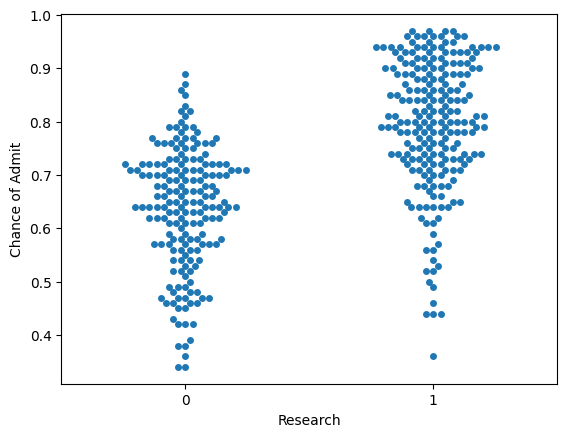

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure()
sns.swarmplot(x='Research', y='ChanceOfAdmit', data=df)
plt.xlabel('Research')
plt.ylabel('Chance of Admit')
plt.show()

In [ ]:
import statsmodels.api as sm

# for b0, 상수항 추가

x_data = df[['GREScore', 'TOEFLScore', 'UniversityRating', 'SOP', 'LOR', 'CGPA','Research']]
x_data1 = sm.add_constant(x_data, has_constant = "add")

target = df["ChanceOfAdmit"]

# OLS 검정
multi_model = sm.OLS(target, x_data1)
fitted_multi_model = multi_model.fit()
fitted_multi_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          ChanceOfAdmit   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     228.9
Date:                Thu, 09 Mar 2023   Prob (F-statistic):          3.12e-134
Time:                        07:48:43   Log-Likelihood:                 537.37
No. Observations:                 400   AIC:                            -1059.
Df Residuals:                     392   BIC:                            -1027.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -1.2594      0.125    -10.097      0.000      -1.505      -1.014
GREScore             0.0017      0.001      2.906      0.004       0.001       0.003
TOEFLScore           0.0029      0.001      2.680      0.008       0.001       0.005
UniversityRating     0.0057      0.005      1.198      0.232      -0.004       0.015
SOP                 -0.0033      0.006     -0.594      0.553      -0.014       0.008
LOR                  0.0224      0.006      4.034      0.000       0.011       0.033
CGPA                 0.1189      0.012      9.734      0.000       0.095       0.143
Research             0.0245      0.008      3.081      0.002       0.009       0.040
==============================================================================
Omnibus:                       87.895   Durbin-Watson:                   0.759
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              181.191
Skew:                          -1.159   Prob(JB):                     4.52e-40
Kurtosis:                       5.344   Cond. No.                     1.31e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.31e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [ ]:
# Split data for test and train the model.
x_train, x_test, y_train, y_test = train_test_split(x_data,target,random_state=0,test_size=0.2)

In [ ]:
#object
linreg = LinearRegression()
# fiting our data for training
linreg.fit(x_train,y_train)

LinearRegression()

In [ ]:
# our model is ready to predict y.
y_pred = linreg.predict(x_test)
y_pred

array([0.69791327, 0.69343926, 0.77882728, 0.61577391, 0.72281999,
       0.60286273, 0.7067783 , 0.64104331, 0.87037545, 0.91874738,
       0.53830841, 0.88537227, 0.70839345, 0.45744365, 0.85464724,
       0.62329657, 0.63034415, 0.81411912, 0.58479826, 0.73198733,
       0.8755188 , 0.8436008 , 0.65964574, 0.45723204, 0.78390781,
       0.58302231, 0.49932541, 0.64153708, 0.88778116, 0.64950902,
       0.64065401, 0.74057509, 0.74268991, 0.55702869, 0.78303581,
       0.77159575, 0.65140153, 0.86244822, 0.63038997, 0.92925287,
       0.72728695, 0.67164181, 0.70967833, 0.80792068, 0.8242496 ,
       0.6540426 , 0.56311848, 0.69211512, 0.60750179, 0.60172386,
       0.67514274, 0.80138513, 0.65205933, 0.87968402, 0.72302425,
       0.75457701, 0.70602419, 0.73465988, 0.75784394, 0.82956036,
       0.77359675, 0.47343091, 0.63752277, 0.52286953, 0.84258874,
       0.82142312, 0.73664582, 0.86699812, 0.76933952, 0.75453984,
       0.59900479, 0.82915301, 0.82822468, 0.60736795, 0.93236

In [ ]:
from sklearn.metrics import r2_score

print('R-squared score:', r2_score(y_test, y_pred))

R-squared score: 0.7355078738145213


In [ ]:
print('The chance of you getting an admit in the US is {}%'.format(round(linreg.predict([[305, 108, 4, 4.5, 4.5, 8.35, 0]])[0]*100, 1)))

The chance of you getting an admit in the US is 67.9%


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
print('The chance of you getting an admit in the US is {}%'.format(round(linreg.predict([[370, 108, 4, 4.5, 4.5, 8.35, 1]])[0]*100, 1)))

The chance of you getting an admit in the US is 83.8%


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# 3.4.9 ChatGPT 활용

In [ ]:
!git clone https://github.com/sangsucki/DataDrivenReport.git

Cloning into 'DataDrivenReport'...
remote: Enumerating objects: 29, done.
remote: Counting objects: 100% (29/29), done.
remote: Compressing objects: 100% (26/26), done.
remote: Total 29 (delta 5), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (29/29), 20.94 MiB | 11.42 MiB/s, done.
Resolving deltas: 100% (5/5), done.


In [ ]:
import pandas as pd
df = pd.read_csv('/content/DataDrivenReport/Admission_Predict.csv')

In [ ]:
df = df.rename(columns={'Serial No.': 'SerialNo', 'GRE Score': 'GREScore',
                        'TOEFL Score': 'TOEFLScore', 'University Rating': 'UniversityRating',
                        'SOP': 'SOP', 'LOR ': 'LOR', 'CGPA': 'CGPA', 'Research': 'Research',
                        'Chance of Admit ': 'ChanceOfAdmit'})
df.columns

Index(['SerialNo', 'GREScore', 'TOEFLScore', 'UniversityRating', 'SOP', 'LOR',
       'CGPA', 'Research', 'ChanceOfAdmit'],
      dtype='object')

In [ ]:
df.head()

SerialNo  GREScore  TOEFLScore  UniversityRating  SOP  LOR  CGPA  Research  \
0         1       337         118                 4  4.5  4.5  9.65         1   
1         2       324         107                 4  4.0  4.5  8.87         1   
2         3       316         104                 3  3.0  3.5  8.00         1   
3         4       322         110                 3  3.5  2.5  8.67         1   
4         5       314         103                 2  2.0  3.0  8.21         0   

   ChanceOfAdmit  
0           0.92  
1           0.76  
2           0.72  
3           0.80  
4           0.65

In [ ]:
import statsmodels.api as sm
import pandas as pd

# Define independent variables (excluding SerialNo)
independent_vars = df.columns.difference(['SerialNo', 'ChanceOfAdmit'])

# Add a constant term for intercept
X = sm.add_constant(df[independent_vars])

# Dependent variable
y = df['ChanceOfAdmit']

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression analysis
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          ChanceOfAdmit   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     228.9
Date:                Fri, 11 Aug 2023   Prob (F-statistic):          3.12e-134
Time:                        16:06:32   Log-Likelihood:                 537.37
No. Observations:                 400   AIC:                            -1059.
Df Residuals:                     392   BIC:                            -1027.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -1.2594      0.125  